# From Genomes to Traits: Reverse Ecology of Uncultivated Freshwater Actinobacteria

### Background and Preliminary Data
#### Trait-Based Ecology
Microbes are critical players in all ecosystems, where they support essential ecosystem functions. While microbes have tremendous influence on ecosystems, microbial ecologists do not have robust approaches to translate microbial-level observations to ecosystem-scale predictions. A better understanding of the microbial contribution to ecosystem behavior will enable more accurate predictions of ecosystem response to drivers such as climate change, as well as the impact these changes will have on ecosystem functions.

Trait-based approaches represent a promising approach for achieving such an understanding: their focus on the measurable properties of an organism (e.g., amino acid requirements, pH sensitivity) enables a mechanistic understanding of species-environment relationships. As a result, the application of trait-based approaches to microbial ecology has the potential to produce generalizable principles that elevate descriptive and correlative studies to a predictive level.

Bacterial communities in freshwater lakes are compelling model systems for which to develop a scaled-up understanding, as these bacteria drive the cycling of most biologically active elements in their ecosystems. In addition, existing heterogeneous datasets, laboratory experiments, and field observations contain a tremendous amount of information about the composition, dynamics, and environmental context of freshwater microbial communities. Of the freshwater bacteria, Actinobacteria are often the numerically dominant phylum, with phylotypes exhibiting contrasting dynamics through time. Nonetheless, the genetic basis underlying this niche partitioning remains unclear. As a result, the Actinobacteria represent a model phylum for linking genomic content to relevant microbial traits.

#### Reverse Ecology
The term reverse ecology refer to a set of computational techniques which aim to infer the ecological traits of an organism directly from its metabolic network. The "flavor" of reverse ecology used in this work relies on the computation of two metabolic network properties, the "seed set" and the "expansion set." The seed set represents the minimal set of metabolites which must be exogenously acquired for growth. These are typically non-unique and can identify the range of nutrient sources used by an organism, as well as those substrates that can substitute for one another.  The expansion set represents the total set of metabolites an organism can synthesize given a set of exogenous metabolites. The two sets of compounds will reveal auxotrophies and biosynthetic capabilities that define metabolic phenotypes for each tribe. 

Furthermore, by comparing seed and expansion sets for each tribe, I can calculate a number of other metrics, including the environmental scope index (ESI) and the cohabitation score (CHS). ESI correlates with environmental flexibility (high ESI scores denote generalists and low scores denote specialists), while CHS measures the amount of competition a species could expect from other organisms. I will also compute the effective metabolic overlap (EMO) between each pair of tribes. The EMO measures the robustness of an organism to competition from other organisms, and EMO scores have been shown to positively correlate with inter-species competition and negatively correlate with growth rates. These metrics will illuminate each tribe’s ecological traits, such as niche (specialist vs. generalist) and robustness to competition

#### Preliminary Data
The McMahon laboratory has learned a tremendous amount about the ecology of freshwater lake bacteria in the past decade. They have developed a curated taxonomy for freshwater microbes, which uses a controlled nomenclature of phylum/lineage/clade/tribe to classify microbes based on 16S rRNA sequences. A total of 79 tribes have been identified, with the Actinobacteria comprising nine lineages, 14 clades, and 32 tribes. Some tribes seem to niche partition based on pH and water chemistry (associated with carbon source, terrestrial vs. aquatic).

The McMahon laboratory and collaborators have sequenced 46 single-cell amplified genomes (SAGs) from Lake Mendota and Trout Bog (Vilas County, WI). They have also sequenced 97 shotgun metagenomes from Lake Mendota, and 90 shotgun metagenomes from Trout Bog. More than 200 draft genomes have been assembled from the metagenomes (GFMs). These data are archived digitally with the public JGI-IMG platform and also through the NTL-LTER public database. Using phylogenetic analysis, I have identified and classified a total of 51 genomes (SAGs+GFMs) belonging to members of the Actinobacteria).

References
1. Green JL, Bohannan BJM, Whitaker RJ (2008) Microbial biogeography: from taxonomy to traits. Science 320: 1039–1043.
2. Levy R, Borenstein E (2012) Reverse Ecology: From Systems to Environments and Back. In: Soyer OS, editor. Advances in Experimental Medicine and Biology. Advances in Experimental Medicine and Biology. New York, NY: Springer New York, Vol. 751. pp. 329–345.
3. Newton RJ, Jones SE, Eiler A, McMahon KD, Bertilsson S (2011) A guide to the natural history of freshwater lake bacteria. Microbiol Mol Biol Rev 75: 14–49.

TO DO
1. Update this section w/ the complete list of reverse ecology metrics proposed in the literature.

### Phylogenetic Reconstruction

Maximum-likelihood estimation was used to build a phylogenetic tree of the 51 SAGs and GFMs in the phylum Actinobacteria. The tree was constructed using RAxML using concatenated alignments of 400 marker genes (from Phylophlan). Organisms were classified using a "guilt by association" approach, in which GFMs were assumed to belong the same lineage/clade/tribe/ as a SAG if they share a parent node w/ that SAG.

Lucky for us we can import image files into this iPython notebook:

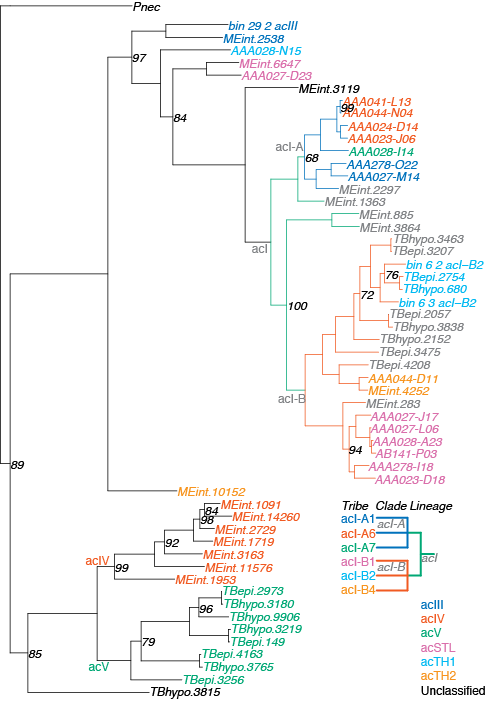

In [2]:
from IPython.display import Image

fig = Image(filename=('imageFiles/2014-12-01 Actinos Tree-RAxML.png'))
fig

The Python package ETE enables the visualization of phylogenetic trees in various formats. See http://etetoolkit.org/download/ for details on usage and installation.

The following code snippet imports a Newick tree from RaXML and creates a png image of the tree in the DataSummaries directory.

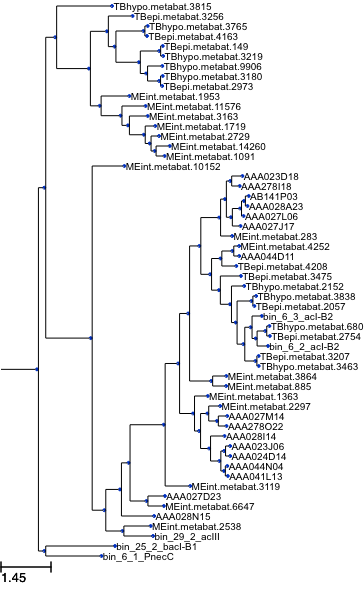

In [7]:
from ete2 import Tree

actinosTree = Tree('rawData/RAxML_bipartitions.Test')
#actinosTree.render('imageFiles/ActinosTree.png')
fig = Image(filename=('imageFiles/ActinosTree.png'))
fig

I will make it pretty at a later time.

References
1. Stamatakis A (2014) RAxML version 8: a tool for phylogenetic analysis and post-analysis of large phylogenies. Bioinformatics 30: 1312–1313.
2. Segata N, Börnigen D, Morgan XC, Huttenhower C (2013) PhyloPhlAn is a new method for improved phylogenetic and taxonomic placement of microbes. Nat Commun 4: 2304.

TO DO
1. Update tree w/ GENREs for SAGs from CSP394 after performing auto-decontamination with ProDeGe.
2. Add new actino genomes from CSP 1329.
3. Expand the code snippet above to create a pretty phylogenetic tree from the Newick tree file.

### Genome Statistics

Genome metadata were downloaded from IMG and processed using a combination of R and Microsoft Excel. Genome completeness was estimated based on presence/absence of the 139 essential genes from the "microbial dark matter." Gene presence/absence was predicted based on COG categories. Here is the summary table I presented at JGI:

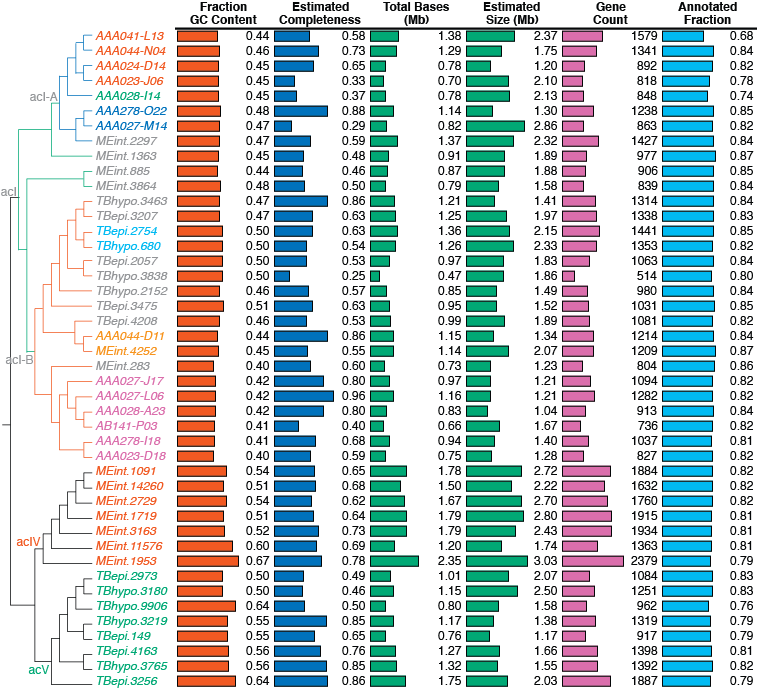

In [6]:
from IPython.display import Image

fig = Image(filename=('imageFiles/ActinoGenomeStats.png'))
fig

In the interest of reproducibility, I would like to write a script to make this figure from the raw data from IMG.

References
1. Rinke C, Schwientek P, Sczyrba A, Ivanova NN, Anderson IJ, et al. (2013) Insights into the phylogeny and coding potential of microbial dark matter. Nature 499: 431–437.

TO DO
1. Translate original workflow into Python, acting directly on metadata exported from IMG.
2. Perform a "proper" genome completeness estimate using HMMs, instead of COG categories.
3. Update w/ new SAGs from CSP 1329.

### From Genomes to Network Reconstructions
The first step in a reverse ecology analysis is to construct a metabolic network for the organism of interest. Metabolic networks are often represented as a genome-scale, metabolic network reconstruction (GENRE), astructured collections of the biochemical transformations occuring within a particular organism. The conversion of a GENRE into a mathametical format enables myriad downstream (computational) systems biology analyses.

GENREs of our 51 actinobacterial SAGs and GFMs were built using the Department of Energy's Systems Biology Knowledgebase (KBase, http://kbase.us/). From an un-annotated set of contigs in FASTA format, KBase performs a genome annotation (using RAST) and constructs a GENRE (using the Model SEED). FASTA files for our genomes were downloaded from zissou.bact.wisc.edu (Zissou) on November 16, 2014. GENREs built by KBase were exported in SBML format, a widely-used standard.

GENREs were built through KBase's command-line IRIS interface. I wrote a bash script to construct GENREs for our genomes in batch mode. The IRIS interface has since been deprecated in favor of the graphical Narrative interface. There is also a new (undocumented) API which provides programmatic Python access to the KBase functions. I have been in contact with the KBase development team regarding the API, and plan to recreate my old workflow in the new interface.

References:
1. Thiele I, Palsson BØ (2010) A protocol for generating a high-quality genome-scale metabolic reconstruction. Nat Protoc 5: 93–121.
2. Aziz RK, Bartels D, Best AA, DeJongh M, Disz T, et al. (2008) The RAST Server: rapid annotations using subsystems technology. BMC Genomics 9: 75.
3. Henry CS, DeJongh M, Best AA, Frybarger PM, Linsay B, et al. (2010) High-throughput generation, optimization and analysis of genome-scale metabolic models. Nat Biotechnol 28: 977–982.

TO DO
1. Create new KBase Narrative for batch generation of GENREs from unannotated genomes.
2. Recreate GENREs for SAGs from CSP394 after performing auto-decontamination with ProDeGe.
3. Add new actino genomes from CSP 1329. I am waiting until I have the new KBase narrative working so I don't have to build them manually one-by-one.

### Comparison of KBase to IMG Annotations
Our lab uses the Department of Energy Joint Genome Institute (JGI)'s Integrated Microbial Genomes (IMG) database/software platform to house and annotate our genomes. Because KBase uses its own annotations for GENRE construction, we wanted to confirm that genome annotations from RAST/KBase are comparable to those from IMG.

For this analysis, I selected the L06 SAG published by Sarahi (Garcia et al ISME J 2013). This SAG is estimated to be > 99% complete, so if you wanted to build a high-quality network model it would be a good candidate due to being a nearly-complete genome. The comparison was done using Microsoft Excel. Here is the summary e-mail I sent to Trina:

I first looked at ORF calls between the two annotation pipelines, and of all ~1300 identified ORFs, the two pipelines agreed in start/sop sites (not annotation) in over 90% of cases. IMG identified slightly more ORFs, mostly at the ends of contigs. The Kbase model contained 333 (27%) of these ORFs (e.g., Kbase could identify a metabolic activity associated with the ORF). This is very typical for a draft metabolic model, and the latest E. coli model only contains ~30% of all ORFs.

I then compared the IMG and Kbase annotations in more detail, to get a feel for how manual curation might improve the content of the draft model. I estimate the draft model could be expanded with an additional 70 annotations (21% more genes), and the annotations of 47 genes (14%) might get revised. Thus, I have high confidence in about 85% of the annotations in the draft model, and believe it represents a large subset of the total metabolic activity in the genome. Obviously this represents a best-case scenario since the L06 SAG is nearly complete and well-annotated, and I'm considering looking at another genome to see if the draft models get worse.

I am satisfied to proceed with the analysis using unrefined Kbase models, as "draft" models are used in large-scale ecological analyses frequently. Later on, it might be interesting to use a curated model of the L06 SAG and see how RE metrics compare to the draft model.

References
1. Garcia SL, McMahon KD, Martinez-Garcia M, Srivastava A, Sczyrba A, et al. (2013) Metabolic potential of a single cell belonging to one of the most abundant lineages in freshwater bacterioplankton. ISME J 7: 137–147.

### Processing of KBase GENREs
The Systems Biology Markup Language (SBML, http://sbml.org/) is a standard format for publication of GENREs. Because the SBML standard is still evolving, not all software platforms support the same version of the standard. Such is the case for KBase and the widely-adopted COBRA Toolbox. Due to its popularity, I wanted to ensure our SBML files were compliant with the version of SBML used by COBRA. To this end, I developed a set of Matlab scripts to perform necessary processing of our SBML files from KBase. The scripts perform the following tasks:
    Import metabolite charges
    Check mass- and charge-balancing
    Import free energy data and assign reaction directions

In addition, KBase GENREs contain some additional reactions which need to be removed prior to Reverse Ecology analysis. The scripts thus remove the following reactions:
    Remove: biomass, exchange, spontaneous, and DNA/RNA biosynthesis
    Remove DNA/RNA biosynthesis
    Adhere to COBRA naming conventions

References
1. Schellenberger J, Que R, Fleming RMT, Thiele I, Orth JD, et al. (2011) Quantitative prediction of cellular metabolism with constraint-based models: the COBRA Toolbox v2.0. Nat Protoc 6: 1290–1307.
2. Ebrahim A, Lerman JA, Palsson BØ, Hyduke DR (2013) COBRApy: COnstraints-Based Reconstruction and Analysis for Python. BMC Syst Biol 7: 74.

TO DO
1. The COBRA toolbox was originally developed in Matlab, and has recently been ported to Python. I plan to re-implement my Matlab workflow in Python, since Python is used by KBase and for Reverse Ecology analysis.
2. This stage still has a manual step to mass- and charge-balance some tricky reactions. I will update the script to perform the necessary manipulations.

### Reverse Ecology